# c-Si panel production

In [1]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as ba
import numpy as np

11:45:39+0100 [warning  ] Can't import `SimaProBlockCSVImporter` - please install `bw2io` with `pip install bw2io[multifunctional]` or install `multifunctional` and `bw_simapro_csv` manually.


In [2]:
bd.projects.set_current("ecoinvent-3.11-cutoff-bw25")
bd.projects

Brightway2 projects manager with 7 objects:
	Another one bikes the dust
	Bicycle example
	USEEIO-1.1
	default
	ecoinvent-3.11-cutoff-bw25
	ecoinvent-3.12-cutoff
	electric_vehicle_standalone
Use `projects.report()` to get a report on all projects.

In [3]:
bi.restore_project_directory('/srv/data/brightway2-project-ecoinvent-3.11-cutoff-bw25-backup.tar.gz', overwrite_existing=True)

Restoring project backup archive - this could take a few minutes...
Restored project: ecoinvent-3.11-cutoff-bw25


'ecoinvent-3.11-cutoff-bw25'

In [4]:
# Adding the databases into the PV project
db = bd.Database("ecoinvent-3.11-cutoff")
db.register()

In [5]:
bd.databases

Databases dictionary with 2 object(s):
	ecoinvent-3.11-biosphere
	ecoinvent-3.11-cutoff

## Creating the nodes

In [6]:
# Creating the nodes for the PV module and PV module production
PV_module = db.new_node(
    name="c-Si PV module",
    unit="kWp",
    type=bd.labels.product_node_default,
)
PV_production = db.new_node(
    name="c-Si PV production",
    location="DE",
    type=bd.labels.process_node_default,
)
PV_EoL = db.new_node(
    name="c-Si PV EOL",
    location="DE",
    type=bd.labels.process_node_default,
)
PV_module.save()
PV_production.save()
PV_EoL.save()

In [7]:
# Getting nodes from ecoinvent
silicon_solar_grade= bd.get_node(id=246559704623259649, database="ecoinvent-3.11-cutoff")
aluminum_frame= bd.get_node(id=246559762810839042, database="ecoinvent-3.11-cutoff")
glass_front_sheet= bd.get_node(id=246559769777577986, database="ecoinvent-3.11-cutoff")
eva_encapsulant= bd.get_node(id=246559786403799041, database="ecoinvent-3.11-cutoff")
backsheet_pet= bd.get_node(id=246559722780401673, database="ecoinvent-3.11-cutoff")
copper_wiring= bd.get_node(id=246559703599849475, database="ecoinvent-3.11-cutoff")
silver_contacts= bd.get_node(id=246559770343809025, database="ecoinvent-3.11-cutoff")
junction_box= bd.get_node(id=246559767613317123, database="ecoinvent-3.11-cutoff")
electricity_mix= bd.get_node(id=246559746184617985, database="ecoinvent-3.11-cutoff")
heat_naturalgas= bd.get_node(id=246559730611167232, database="ecoinvent-3.11-cutoff")
all_transport= bd.get_node(id=246559732137893888, database="ecoinvent-3.11-cutoff")
silicon_kerf_loss= bd.get_node(id=246559763263823876, database="ecoinvent-3.11-cutoff")
waste_plastic = bd.get_node(id=246559782427598848, database="ecoinvent-3.11-cutoff")
waste_others = bd.get_node(id=246559740333563904, database="ecoinvent-3.11-cutoff")

## Creating the edges

In [8]:
import pandas as pd

# Step 1: Read the CSV file
# Replace 'your_file.csv' with your actual filename or path
dfi = pd.read_csv('material_inflows_PV.csv')
dfo = pd.read_csv('material_outflows_PV.csv')
capi = pd.read_csv('stockdriven_inflow_capacity.csv')
capo = pd.read_csv('stockdriven_outflow_capacity.csv')

# Step 2: Check the columns (optional, to confirm structure)
print(dfi.columns)

# Step 3: Convert each column into a separate list
Year = dfi['Year'].tolist()
Ag = dfi['Ag'].tolist()
Al = dfi['Al'].tolist()
Cu = dfi['Cu'].tolist()
Electrolyte = dfi['Electrolyte'].tolist()
Li = dfi['Li'].tolist()
PP = dfi['PP'].tolist()
Si = dfi['Si'].tolist()
Steel = dfi['Steel'].tolist()

Si_waste = dfo['Si'].tolist()
Ag_waste = dfo['Ag'].tolist()
Al_waste = dfo['Al'].tolist()
Cu_waste = dfo['Cu'].tolist()

inflow_capacity = capi['PV'].tolist()   # in kWp
outflow_capacity = capo['PV'].tolist()  # in kWp

inflow = [110, 21, 21, 21, 21, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 16, 16, 16, 16, 126]
inflow_capacity_base = np.array(inflow)*1e6       # in kWp
outflow = [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	110]
outflow_capacity_base = np.array(outflow)*1e6       # in kWp

Index(['Year', 'Ag', 'Al', 'Cu', 'Electrolyte', 'Li', 'PP', 'Si', 'Steel'], dtype='object')


In [9]:
# Defining the inventory update based on input data from MFA

def update_inventory_manufacturing(Time): 

    time_index = Year.index(Time)
   
    # Main production output
    PV_production.new_edge(
        amount=1,
        input=PV_module,
        type=bd.labels.production_edge_default,
        functional=True,
    ).save()
    
    # Material inputs    
    PV_production.new_edge(
        amount=Si[time_index]/(inflow_capacity[time_index]),
        input=silicon_solar_grade,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    PV_production.new_edge(
        amount=Al[time_index]/(inflow_capacity[time_index]),
        input=aluminum_frame,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=66,
        input=glass_front_sheet,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=3.3,
        input=eva_encapsulant,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=2.2,
        input=backsheet_pet,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=Cu[time_index]/(inflow_capacity[time_index]),
        input=copper_wiring,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=Ag[time_index]/(inflow_capacity[time_index]),
        input=silver_contacts,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=1.1/18.5,             # Junction box unit in piece, 18.5 kg/piece
        input=junction_box,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    
    # Energy
    PV_production.new_edge(
        amount=2200,
        input=electricity_mix,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=275,
        input=heat_naturalgas,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    
    # Transport
    PV_production.new_edge(
        amount=3850,
        input=all_transport,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()

def update_inventory_EoL(Time): 

    time_index = Year.index(Time)
    
    # Waste (manufacturing)
    PV_production.new_edge(
        amount=Si_waste[time_index]/(outflow_capacity[time_index]),
        input=silicon_kerf_loss,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    PV_production.new_edge(
        amount=(Ag_waste[time_index] + Al_waste[time_index] + Cu_waste[time_index])/(outflow_capacity[time_index]),
        input=waste_others,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()


GWP CALCULATIONS

In [10]:
GWP_per_kWp_by_year_manufacturing = {}
method_gwp_100 = (
        'ecoinvent-3.11',
        'CML v4.8 2016 no LT',
        'climate change no LT',
        'global warming potential (GWP100) no LT'
    )
for i in Year:
    update_inventory_manufacturing(i)
    functional_unit = PV_module
    impact_category=method_gwp_100
    
    lca = bc.LCA({functional_unit: 1}, method=impact_category)
    lca.lci()
    lca.lcia()
    GWP_per_kWp_by_year_manufacturing[i] = lca.score

In [11]:
GWP_per_kWp_by_year_EoL = {}
method_gwp_100 = (
        'ecoinvent-3.11',
        'CML v4.8 2016 no LT',
        'climate change no LT',
        'global warming potential (GWP100) no LT'
    )
for i in Year:
    update_inventory_EoL(i)
    functional_unit = PV_module
    impact_category=method_gwp_100
    
    lca = bc.LCA({functional_unit: 1}, method=impact_category)
    lca.lci()
    lca.lcia()
    GWP_per_kWp_by_year_EoL[i] = lca.score

In [12]:
GWP_per_kWp_by_year_manufacturing

{2025: 2150.2365964351716,
 2026: 2142.7130834011027,
 2027: 2135.3129598783876,
 2028: 2128.0340144400957,
 2029: 2120.8738575581656,
 2030: 2113.830431763398,
 2031: 2106.901510835067,
 2032: 2100.085048734606,
 2033: 2093.3788933400647,
 2034: 2086.781072232006,
 2035: 2080.2896152162584,
 2036: 2073.9025332145943,
 2037: 2067.6179410416944,
 2038: 2061.4340118778237,
 2039: 2055.348807133478,
 2040: 2049.3606691456607,
 2041: 2043.4676666337998,
 2042: 2037.6681835004167,
 2043: 2031.9605271394641,
 2044: 2026.342981325803,
 2045: 2020.8139600061625}

In [13]:
GWP_per_kWp_by_year_EoL

{2025: 2020.5949696891141,
 2026: 2020.3759793720637,
 2027: 2020.1569890550154,
 2028: 2019.9379987379662,
 2029: 2019.719008421795,
 2030: 2019.5000185792962,
 2031: 2019.281042903153,
 2032: 2019.062193036521,
 2033: 2018.8438687898947,
 2034: 2018.626895385465,
 2035: 2018.4124255347215,
 2036: 2018.2016452309158,
 2037: 2017.9954342688047,
 2038: 2017.7941773312516,
 2039: 2017.5978648887506,
 2040: 2017.4063252750047,
 2041: 2017.2193661013582,
 2042: 2017.0368252205994,
 2043: 2016.8585861757324,
 2044: 2016.6845903681415,
 2045: 2016.5148261490797}

In [17]:
GWP_per_kWp_by_year = {key: GWP_per_kWp_by_year_manufacturing[key] + GWP_per_kWp_by_year_EoL.get(key, 0) for key in GWP_per_kWp_by_year_manufacturing}
GWP_per_kWp_by_year_manufacturing

{2025: 2150.2365964351716,
 2026: 2142.7130834011027,
 2027: 2135.3129598783876,
 2028: 2128.0340144400957,
 2029: 2120.8738575581656,
 2030: 2113.830431763398,
 2031: 2106.901510835067,
 2032: 2100.085048734606,
 2033: 2093.3788933400647,
 2034: 2086.781072232006,
 2035: 2080.2896152162584,
 2036: 2073.9025332145943,
 2037: 2067.6179410416944,
 2038: 2061.4340118778237,
 2039: 2055.348807133478,
 2040: 2049.3606691456607,
 2041: 2043.4676666337998,
 2042: 2037.6681835004167,
 2043: 2031.9605271394641,
 2044: 2026.342981325803,
 2045: 2020.8139600061625}

In [18]:
GWP_per_kWp_by_year

{2025: 4170.831566124286,
 2026: 4163.089062773166,
 2027: 4155.469948933403,
 2028: 4147.972013178061,
 2029: 4140.592865979961,
 2030: 4133.330450342694,
 2031: 4126.18255373822,
 2032: 4119.147241771127,
 2033: 4112.222762129959,
 2034: 4105.4079676174715,
 2035: 4098.70204075098,
 2036: 4092.10417844551,
 2037: 4085.613375310499,
 2038: 4079.228189209075,
 2039: 4072.946672022229,
 2040: 4066.7669944206655,
 2041: 4060.687032735158,
 2042: 4054.7050087210164,
 2043: 4048.819113315197,
 2044: 4043.0275716939445,
 2045: 4037.328786155242}

In [19]:
GWP_total_by_year_manufacturing = {key: value * factor for key, value, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), GWP_per_kWp_by_year_manufacturing.values(), inflow_capacity)}
GWP_total_by_year_EoL ={key: value * factor for key, value, factor in zip(GWP_per_kWp_by_year_EoL.keys(), GWP_per_kWp_by_year_EoL.values(), outflow_capacity)}
GWP_total_by_year = {key: GWP_total_by_year_manufacturing[key] + GWP_total_by_year_EoL.get(key, 0) for key in GWP_total_by_year_manufacturing}
GWP_total_by_year

{2025: 45194299406.523,
 2026: 45507868781.749016,
 2027: 47927700156.68018,
 2028: 55403879811.405846,
 2029: 69160519337.3378,
 2030: 86379619965.27449,
 2031: 98249682877.483,
 2032: 110280100984.84035,
 2033: 117902029070.49313,
 2034: 122389533051.18643,
 2035: 125583528211.32741,
 2036: 127251507546.95328,
 2037: 132907822761.44653,
 2038: 140829916330.60504,
 2039: 150397560676.53665,
 2040: 160574210995.3836,
 2041: 166256955726.3339,
 2042: 174830314145.5972,
 2043: 181764367854.63113,
 2044: 187206883453.97412,
 2045: 191909634301.8189}

In [20]:
first_key = next(iter(GWP_per_kWp_by_year_manufacturing))
base1_value_manufacturing = GWP_per_kWp_by_year_manufacturing[first_key]
Base1_GWP_total_by_year_manufacturing = {year: base1_value_manufacturing * factor for year, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), inflow_capacity_base)}

first_key_EoL = next(iter(GWP_per_kWp_by_year_EoL))
base1_value_EoL = GWP_per_kWp_by_year_EoL[first_key_EoL]
Base1_GWP_total_by_year_EoL = {year: base1_value_EoL * factor for year, factor in zip(GWP_per_kWp_by_year_EoL.keys(), outflow_capacity_base)}

Base1_GWP_total_by_year = {key: Base1_GWP_total_by_year_manufacturing[key] + Base1_GWP_total_by_year_EoL.get(key, 0) for key in Base1_GWP_total_by_year_manufacturing}
Base1_GWP_total_by_year

{2025: 236526025607.86887,
 2026: 45154968525.1386,
 2027: 45154968525.1386,
 2028: 45154968525.1386,
 2029: 45154968525.1386,
 2030: 40854495332.26826,
 2031: 40854495332.26826,
 2032: 40854495332.26826,
 2033: 40854495332.26826,
 2034: 40854495332.26826,
 2035: 38704258735.83309,
 2036: 38704258735.83309,
 2037: 38704258735.83309,
 2038: 38704258735.83309,
 2039: 38704258735.83309,
 2040: 38704258735.83309,
 2041: 34403785542.962746,
 2042: 34403785542.962746,
 2043: 34403785542.962746,
 2044: 34403785542.962746,
 2045: 493195257816.63416}

In [21]:
first_key = next(iter(GWP_per_kWp_by_year_manufacturing))
base2_value_manufacturing = GWP_per_kWp_by_year_manufacturing[first_key]
Base2_GWP_total_by_year_manufacturing = {year: base2_value_manufacturing * factor for year, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), inflow_capacity)}

first_key_EoL = next(iter(GWP_per_kWp_by_year_EoL))
base2_value_EoL = GWP_per_kWp_by_year_EoL[first_key_EoL]
Base2_GWP_total_by_year_EoL = {year: base2_value_EoL * factor for year, factor in zip(GWP_per_kWp_by_year_EoL.keys(), outflow_capacity)}

Base2_GWP_total_by_year = {key: Base2_GWP_total_by_year_manufacturing[key] + Base2_GWP_total_by_year_EoL.get(key, 0) for key in Base2_GWP_total_by_year_manufacturing}
Base2_GWP_total_by_year

{2025: 45194299406.523,
 2026: 45666812714.99317,
 2027: 48252505081.6499,
 2028: 55929185514.96221,
 2029: 69956952254.37291,
 2030: 87525111253.88542,
 2031: 99703026707.3784,
 2032: 112116042888.25748,
 2033: 120095829960.91928,
 2034: 124913740004.09824,
 2035: 128426981889.65489,
 2036: 130355502557.65302,
 2037: 136390886113.95415,
 2038: 144757597149.8847,
 2039: 154830907403.0913,
 2040: 165554973710.73975,
 2041: 171588060855.67776,
 2042: 180704801074.67166,
 2043: 188154571611.45142,
 2044: 194082096692.8841,
 2045: 199257133234.93567}

In [22]:
Difference_GWP_total_lifetime = {key: Base2_GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in Base2_GWP_total_by_year}
Difference_GWP_total_material = {key: GWP_total_by_year[key] - Base2_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}
Difference_GWP_total_overall = {key: GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}

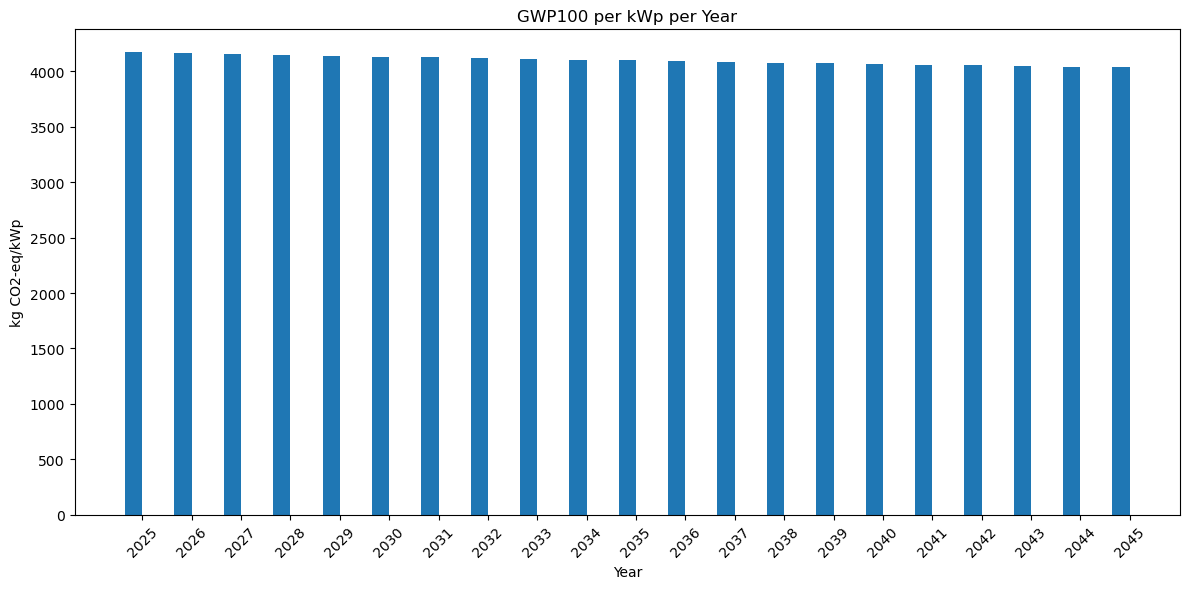

In [23]:
import matplotlib.pyplot as plt

# Extract years and values
years = list(GWP_per_kWp_by_year.keys())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(GWP_per_kWp_by_year.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq/kWp')
plt.title('GWP100 per kWp per Year')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

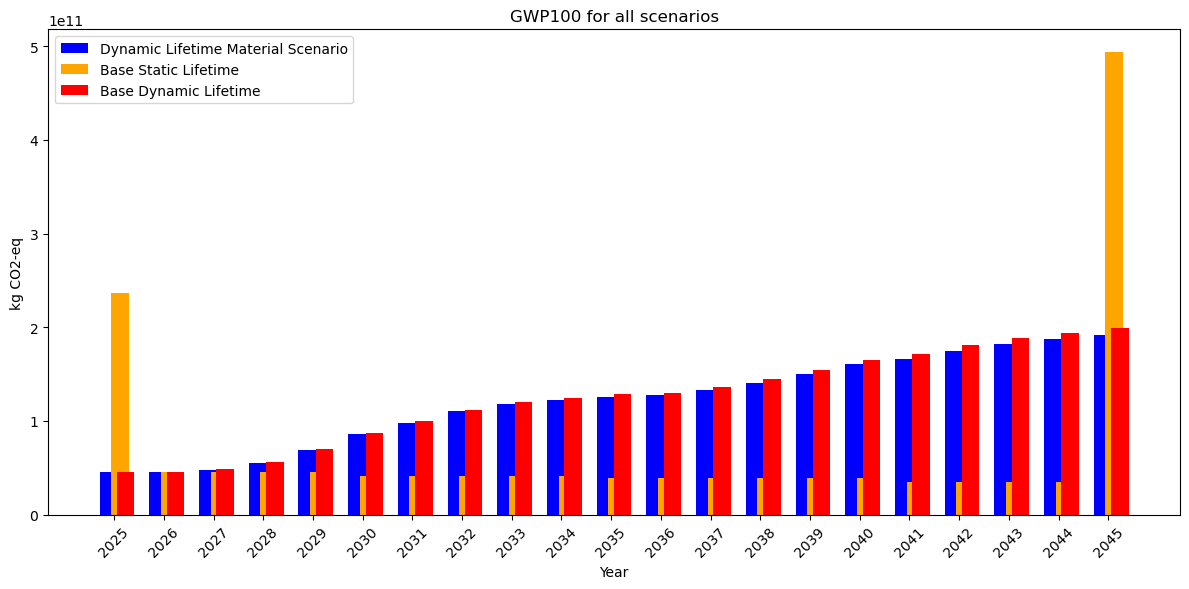

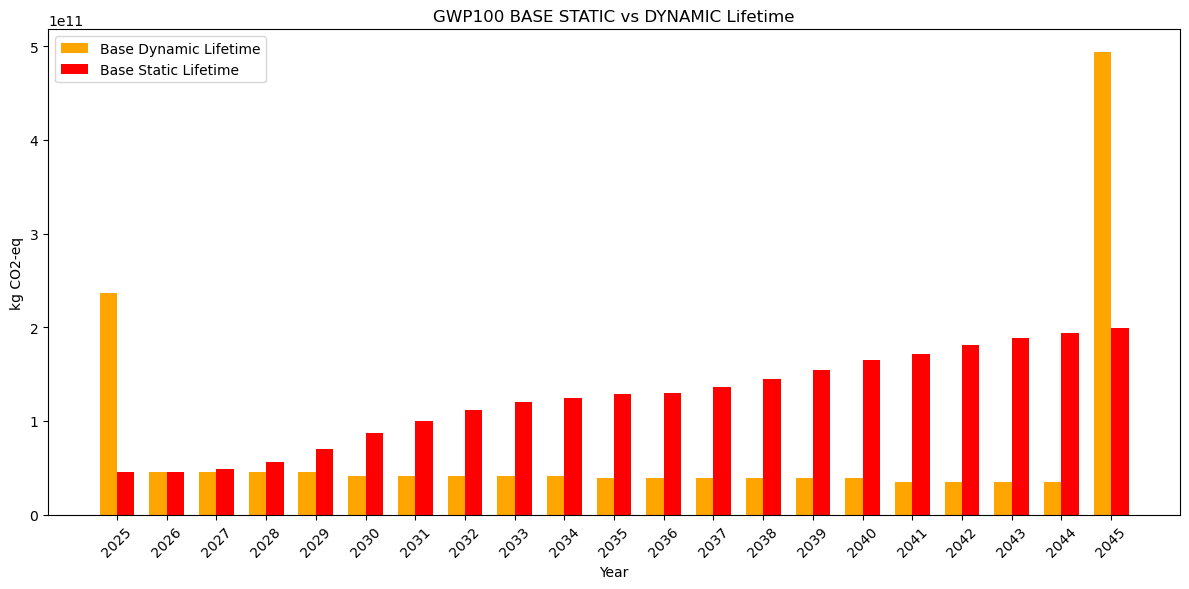

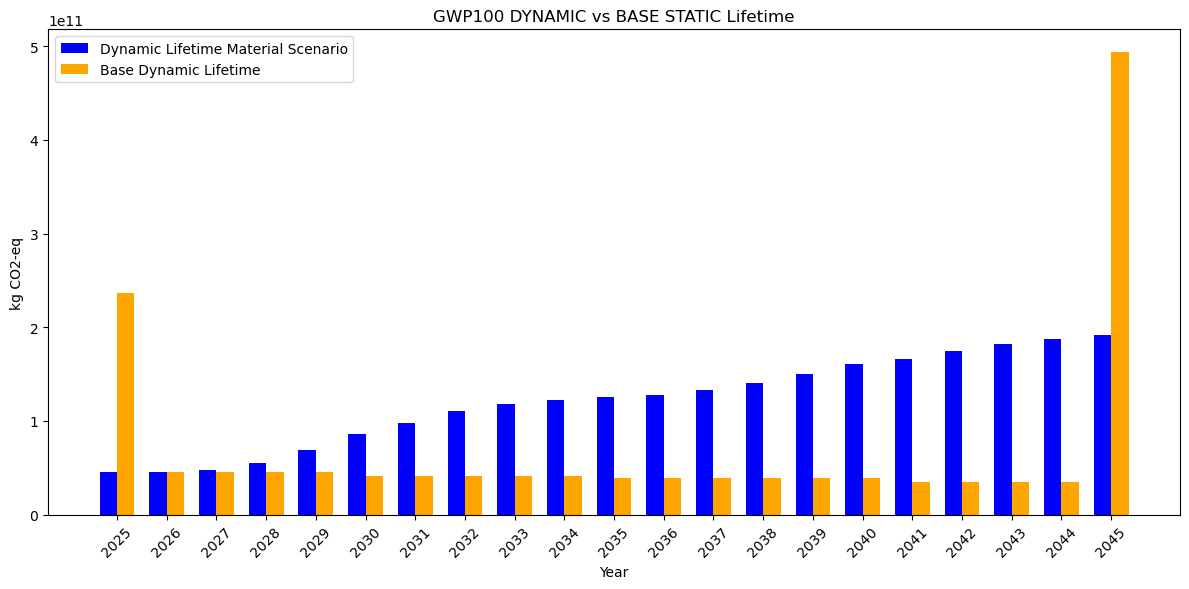

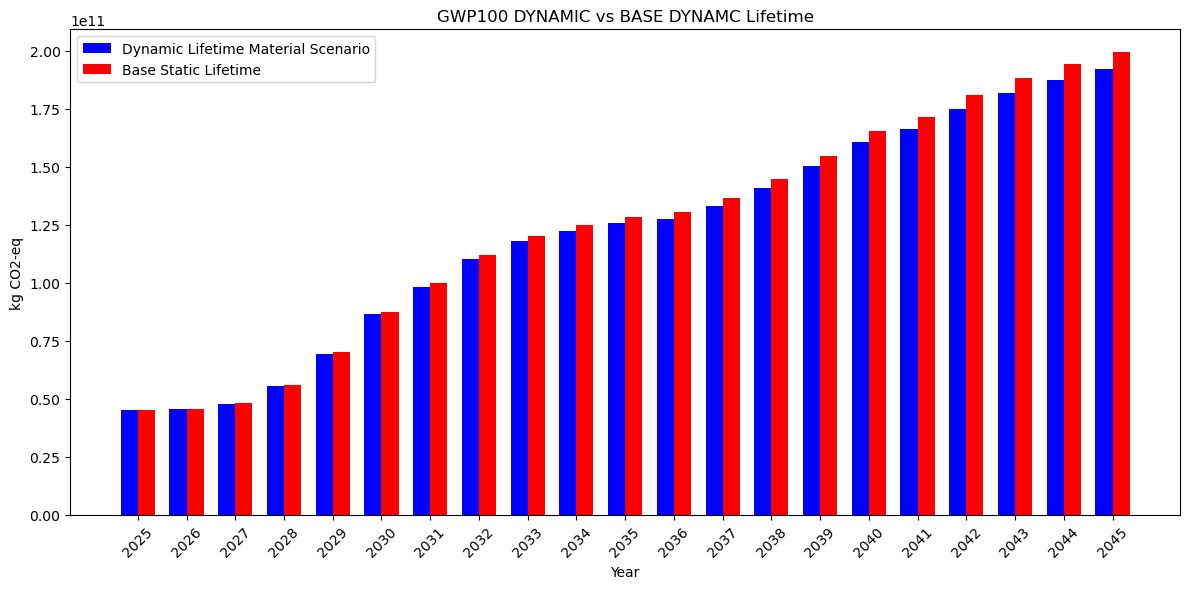

In [24]:
### ALL compared
# Extract values
values1 = list(GWP_total_by_year.values())
values2 = list(Base1_GWP_total_by_year.values())
values3 = list(Base2_GWP_total_by_year.values())


# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/3 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/3 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='orange')
plt.bar([i + 2*bar_width/3 for i in x], values3, width=bar_width, label='Base Dynamic Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 for all scenarios')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### GRAPH BASE 1 vs BASE 2
# Extract values
values1 = list(Base1_GWP_total_by_year.values())
values2 = list(Base2_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Base Dynamic Lifetime', color='orange')
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 BASE STATIC vs DYNAMIC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### GRAPH DYNAMIC VS BASE 1
# Extract values
values1 = list(GWP_total_by_year.values())

# Second dataset (baseline scenario): I wrote it constant 20000000000 manually for now
values2 = list(Base1_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Dynamic Lifetime', color='orange')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 DYNAMIC vs BASE STATIC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### GRAPH DYNAMIC VS BASE 2
# Extract values
values1 = list(GWP_total_by_year.values())
values2 = list(Base2_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 DYNAMIC vs BASE DYNAMC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

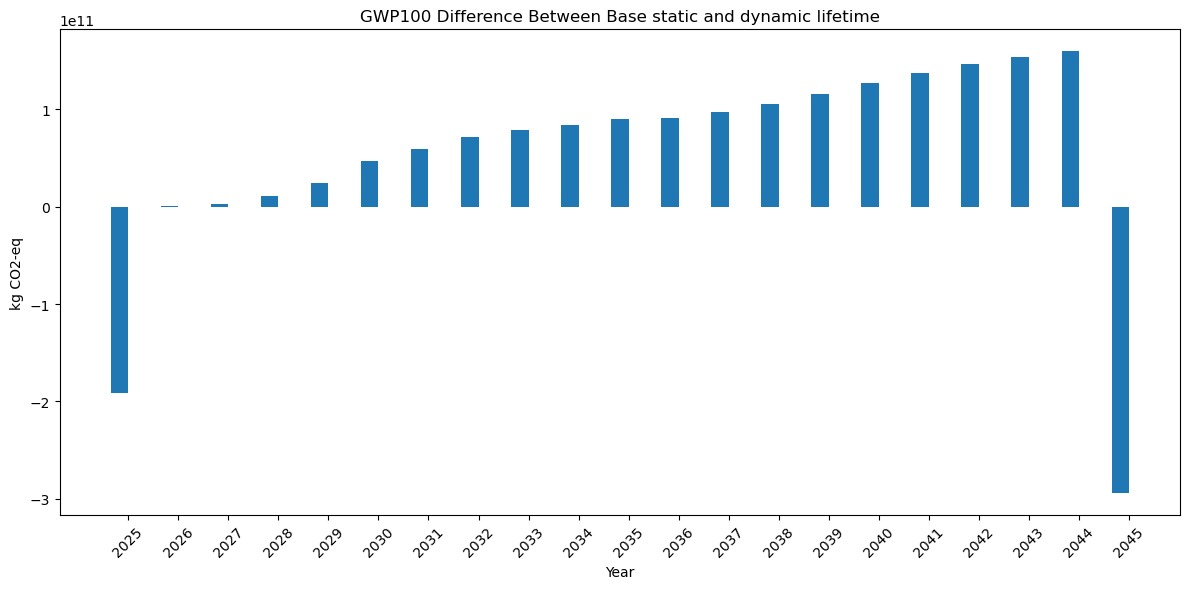

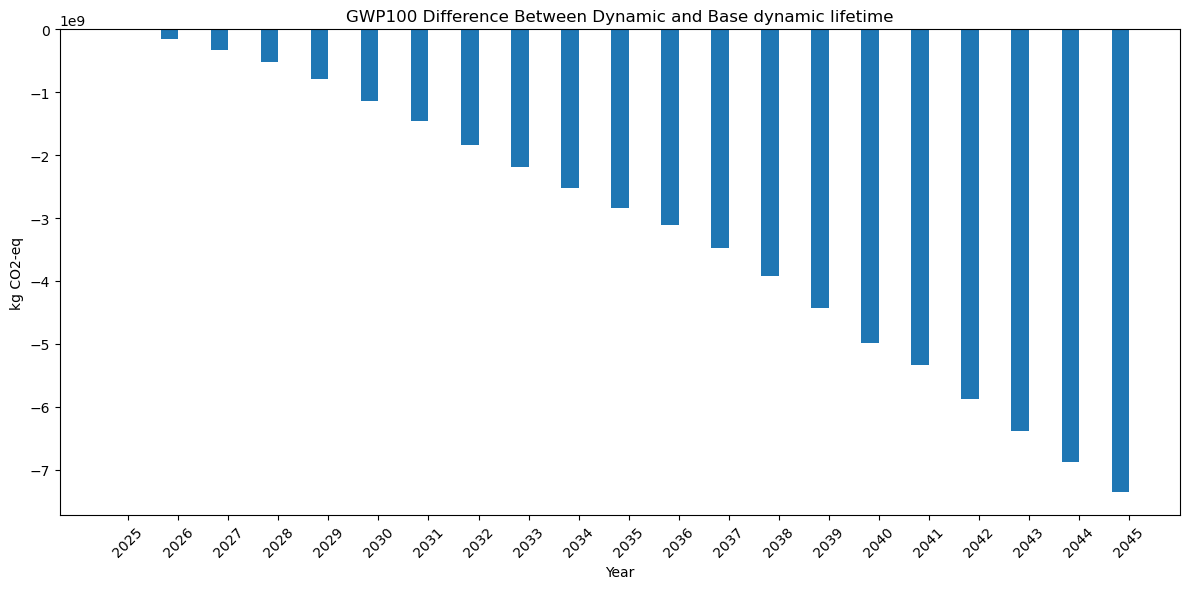

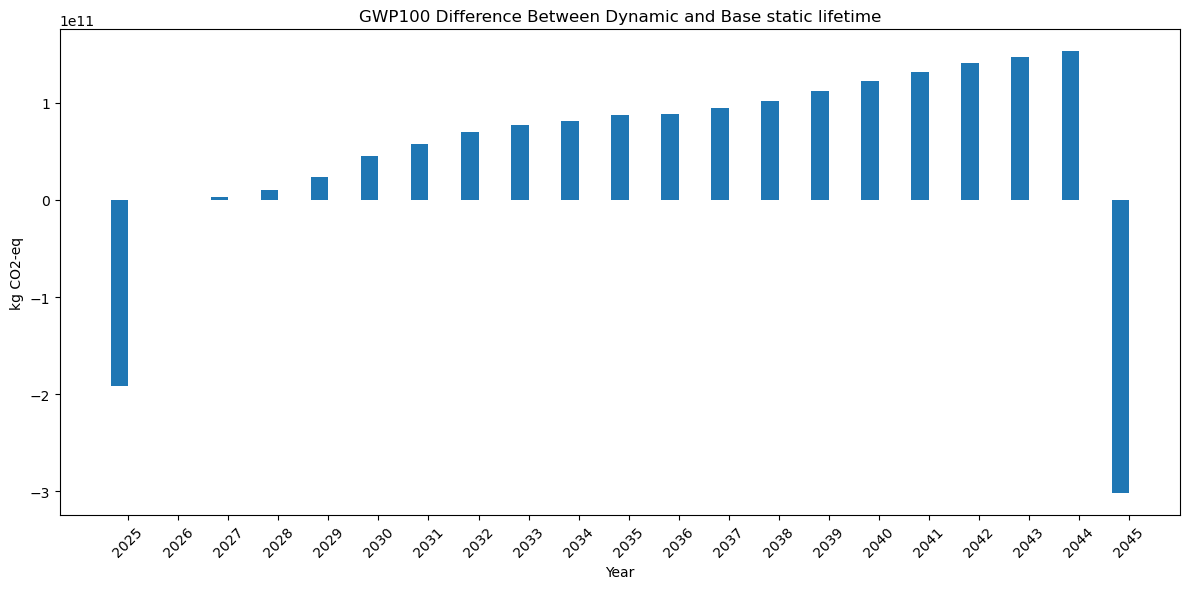

In [25]:
Difference_GWP_total_lifetime = {key: Base2_GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in Base2_GWP_total_by_year}
Difference_GWP_total_material = {key: GWP_total_by_year[key] - Base2_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}
Difference_GWP_total_overall = {key: GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_lifetime.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 Difference Between Base static and dynamic lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_material.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 Difference Between Dynamic and Base dynamic lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_overall.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg CO2-eq')
plt.title('GWP100 Difference Between Dynamic and Base static lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()